In [1]:
import json
import re
from pnf import PointFigureChart
import pandas as pd
import numpy as np

# Define your column names here
column_names = ['open_time', 'open', 'high', 'low', 'close', 'volume', 
                'close_time', 'quote_volume', 'count', 
                'taker_buy_volume', 'taker_buy_quote_volume', 'ignore']


In [2]:

# Load the CSV data into a DataFrame, setting column names directly
df = pd.read_csv('btcusdt.csv', names=column_names, header=None)

df = df.rename(columns={'open_time': 'date'})

df['date'] = pd.to_datetime(df['date'], unit='ms').dt.strftime('%Y-%m-%d')
print(df['open'][1])

# Convert the DataFrame to a dictionary of NumPy arrays
data_dict = {col: np.array(df[col]) for col in df.columns}

# Step 2: Create a Point and Figure Chart
# This assumes you have a function or class PointFigureChart available.
# You might need to adjust parameters or implementation details based on the actual library or your custom function.
chart = PointFigureChart(data_dict, 'cl', 3, 0.3, 'log', 'BTCUSDT')


42397.22


In [3]:
chart.bollinger(10, 2)
chart.donchian(8,2)
chart.psar(0.02, 0.2)
chart.sma(10)
#chart.cut2indicator=True

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 44381.371 ,
       44318.1835, 44311.8365, 44188.2145, 43917.407 , 43639.364 ,
       43408.1875, 43268.248 , 43155.126 , 43008.627 , 43060.558 ,
       43246.436 , 43381.84  , 43498.863 , 43602.572 , 43699.8765,
       43790.8935, 43856.985 , 43943.232 , 44157.934 , 44468.921 ,
       44766.827 , 45043.7965, 45357.5905, 45634.965 , 45843.1075,
       46044.6905, 46200.5055, 46267.9975, 46254.2755, 46212.4865,
       46184.5855, 46136.082 , 46010.712 , 45914.076 , 45976.3435,
       46045.5755, 46178.412 , 46365.765 , 46434.79  , 46427.867 ,
       46386.328 , 46250.529 , 46022.746 , 45809.326 , 45525.816 ,
       45151.137 , 44667.144 , 44209.379 , 43861.476 , 43521.537 ,
       43215.173 , 43012.567 , 42896.591 , 42761.9965, 42633.133 ,
       42601.1875, 42639.5565, 42658.789 , 42652.3655, 42626.7865,
       42620.363 , 42639.557 , 42658.675 , 42620.989 , 42495.9

In [4]:
chart._prepare_variables_for_plotting()


In [5]:
with open('index.html', 'r') as file:
    data = file.read()

In [6]:
pattern = r'let title = \".*?\";'
data_str = json.dumps(chart.title)
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let title = {data_str};', data, flags=re.DOTALL)


In [7]:
pattern = r'let scaling = \".*?\";'
data_str = json.dumps(chart.scaling)
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let scaling = {data_str};', data, flags=re.DOTALL)


In [8]:
pattern = r'let boxSize = .*?;'
data_str = json.dumps(chart.boxsize)
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let boxSize = {data_str};', data, flags=re.DOTALL)


In [9]:
pattern = r'let matrix = \[.*?\];'
data_str = json.dumps(chart.plot_matrix.tolist())
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let matrix = {data_str};', data, flags=re.DOTALL)


In [10]:
pattern = r'let boxScale = \[.*?\];'
data_str = json.dumps(chart.plot_boxscale.tolist())
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let boxScale = {data_str};', data, flags=re.DOTALL)


In [11]:
pattern = r'let trendLines = \{.*?\};'
data_str = json.dumps({k: v.tolist() for k, v in chart.get_trendlines().items()})
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let trendLines = {data_str};', data, flags=re.DOTALL)


In [12]:
pattern = r'let breakOuts = \{.*?\};'
data_str = json.dumps({k: v.tolist() for k, v in chart.get_breakouts().items()})
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let breakOuts = {data_str};', data, flags=re.DOTALL)


In [13]:
pattern = r'let indicators = \{.*?\};'
data_str = json.dumps({k: v.tolist() for k, v in chart.plot_indicator.items()})
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let indicators = {data_str};', data, flags=re.DOTALL)


In [14]:
pattern = r'let columnLabels = \[.*?\];'
data_str = json.dumps(chart.column_labels)
# Replace the matched pattern with the new data string
data = re.sub(pattern, f'let columnLabels = {data_str};', data, flags=re.DOTALL)


In [15]:
with open('btc2.html', 'w') as file:
    file.write(data)

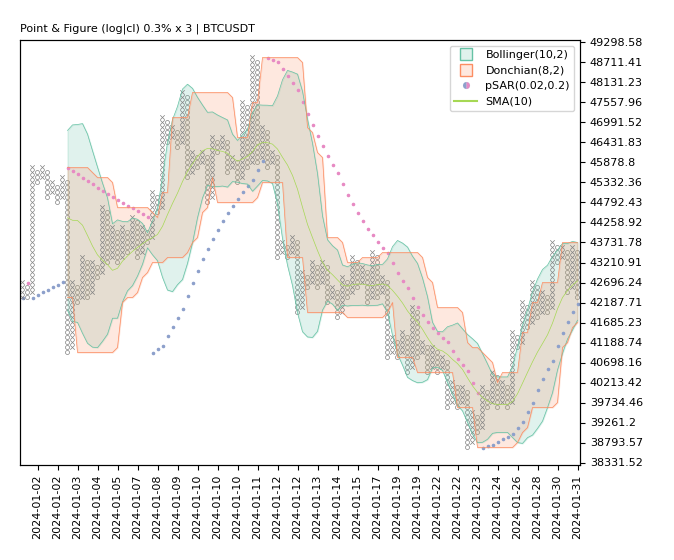

In [16]:
chart.show()